# Supplementary Informations: Wave Climatology in the Gulf Stream Region
##### g.marechal (Toulouse, August 2025)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [4]:
# path_model = '' # request the model outputs to the authors
ds_ww3 = xr.open_dataset('/Volumes/Baraddur/WW3/FULL/combine_ww3_daily.nc')
path_output = '../figures/'

### Compute the wave age

In [7]:
g = 9.81
wavenumber = (2*np.pi*ds_ww3.fp.values)**2/g
cp = np.sqrt(g/wavenumber)
wspd = (ds_ww3.uwnd.values**2 + ds_ww3.vwnd.values**2)**(1/2)
wave_age = cp/wspd

/var/folders/bx/gz6w8d_533x2h1m1pq2pt88m0000gn/T/ipykernel_26156/1310059861.py:5: RuntimeWarning: divide by zero encountered in divide
  wave_age = cp/wspd


In [8]:
bins = np.linspace(0, 5, 100)

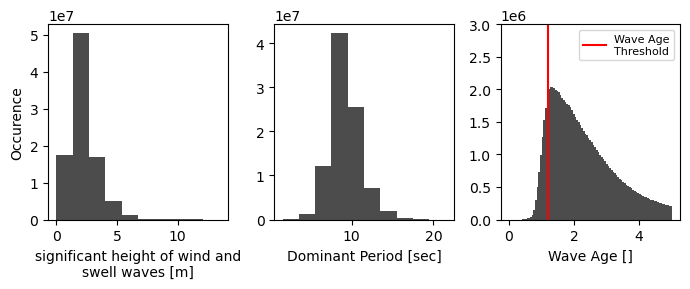

In [9]:
fig, axes = plt.subplots(ncols = 3, figsize = (7, 3))
ax = axes[0]
ds_ww3.hs.plot.hist(ax = ax, color = 'k', alpha = .7)
ax.set_ylabel('Occurence')
ax = axes[1]
(1/(ds_ww3.fp)).plot.hist(ax = ax, color = 'k', alpha = .7)
ax.set_xlabel('Dominant Period [sec]')
ax = axes[2]
ax.hist(wave_age.ravel(), bins = bins, color = 'k', alpha = .7)
ax.plot([1.2, 1.2], [0, 1.8e7], color = 'r', label = 'Wave Age\nThreshold')
ax.set_ylim([0, .3e7])
ax.set_xlabel('Wave Age []')
ax.legend(fontsize = 8)
plt.tight_layout()
# plt.savefig(path_output + '/SI_wave_age_clim.png', dpi = 300)